# Title

## Business Problem

##  Data Understanding

bom.movie_gross.csv.gz - Dan  
tn.movie_budgets.csv.gz - Dan  
rt.reviews.tsv.gz - Gina  
rt.movie_info.tsv.gz - Dre  
tmdb.movies.csv.gz - Dre  
im.db (SQLite)

The data came from multiple sources, including <a href="https://www.boxofficemojo.com/">Box Office Mojo</a>, <a href="https://www.imdb.com/">IMDB</a>, <a href="https://www.rottentomatoes.com/">Rotten Tomatoes</a>, <a href="https://www.themoviedb.org/">The Movie DB</a>, and <a href="https://www.the-numbers.com/">The Numbers</a>.  Given these different data sets, we began by reading them and deciding how we could join together the relevant data.

There were some limitations to the data because not all of the sources could be readily joined with each other.  Some of the information didn't even include the titles of the movies that it was evaluating.

In [4]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

In [5]:
# Read in SQL data and connect to sqlite3

db_file = 'zippedData/im.db/im.db'
conn = sqlite3.connect(db_file)

In [6]:
# Read in data in csv files

df_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
df_budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
df_tmdb = pd.read_csv('zippedData/tmdb.movies.csv.gz')
df_movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t', encoding='latin')
df_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='latin')

In [7]:
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [8]:
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [18]:
# Look at the timeframe of the release dates

df_budget.sort_values('release_date', ascending = False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
3712,13,"Sep 9, 2016",Kicks,"$10,000,000","$150,191","$150,191"
3584,85,"Sep 9, 2016",When the Bough Breaks,"$10,000,000","$29,747,603","$30,768,449"
3129,30,"Sep 9, 2016",The Disappointments Room,"$15,000,000","$2,423,467","$3,503,761"
3287,88,"Sep 9, 2016",Robinson Crusoe,"$13,000,000","$8,005,586","$42,446,455"
849,50,"Sep 9, 2016",Sully,"$60,000,000","$125,070,033","$238,524,556"
...,...,...,...,...,...,...
1408,9,"Apr 1, 2005",Sin City,"$40,000,000","$74,103,820","$158,527,918"
5769,70,"Apr 1, 1996",Bang,"$10,000",$527,$527
2260,61,"Apr 1, 1988","Bright Lights, Big City","$25,000,000","$16,118,077","$16,118,077"
5520,21,"Apr 1, 1986",My Beautiful Laundrette,"$400,000",$0,$0


In [19]:
# Create a pandas dataframe from SQL table persons

sql_persons = pd.read_sql_query ("""
    SELECT *
    FROM persons
""", conn)
df_persons = pd.DataFrame(sql_persons, columns = ['person_id', 'primary_name', 'birth_year', 'death_year', 'primary_profession'])
df_persons

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [11]:
df_persons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB


In [20]:
# Create a pandas dataframe from SQL table directors

sql_directors = pd.read_sql_query ("""
    SELECT *
    FROM directors
""", conn)
df_directors = pd.DataFrame(sql_directors, columns = ['person_id', 'movie_id'])
df_directors

,person_id,movie_id
0,nm0899854,tt0285252
1,nm1940585,tt0462036
2,nm0151540,tt0835418
3,nm0151540,tt0835418
4,nm0089502,tt0878654
...,...,...
291169,nm10122357,tt8999974
291170,nm6711477,tt9001390
291171,nm10123242,tt9001494
291172,nm10123248,tt9001494


In [13]:
df_directors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  291174 non-null  object
 1   movie_id   291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB


In [21]:
# Create a pandas dataframe from SQL table movie_basics

sql_movie_basics = pd.read_sql_query ("""
    SELECT *
    FROM movie_basics
""", conn)
df_movie_basics = pd.DataFrame(sql_movie_basics, columns = ['movie_id', 'primary_title', 'start_year', 'genres'])
df_movie_basics

,movie_id,primary_title,start_year,genres
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,Drama
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy"
...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,2019,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,Documentary
146141,tt9916706,Dankyavar Danka,2013,Comedy
146142,tt9916730,6 Gunn,2017,None


In [15]:
df_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   movie_id       146144 non-null  object
 1   primary_title  146144 non-null  object
 2   start_year     146144 non-null  int64 
 3   genres         140736 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.5+ MB


In [22]:
# Create a pandas dataframe from SQL table movie_ratings

sql_movie_ratings = pd.read_sql_query ("""
    SELECT *
    FROM movie_ratings
""", conn)
df_movie_ratings = pd.DataFrame(sql_movie_ratings, columns = ['movie_id', 'averagerating', 'numvotes'])
df_movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [17]:
df_movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [23]:
# Merge the df_persons and df_directors dataframes

df_directors_persons = df_directors.merge(df_persons, left_on = 'person_id', right_on = 'person_id', how = 'inner')
df_directors_persons

,person_id,movie_id,primary_name,birth_year,death_year,primary_profession
0,nm0899854,tt0285252,Tony Vitale,1964.0,NaN,"producer,director,writer"
1,nm1940585,tt0462036,Bill Haley,NaN,NaN,"director,writer,producer"
2,nm0151540,tt0835418,Jay Chandrasekhar,1968.0,NaN,"director,actor,writer"
3,nm0151540,tt0835418,Jay Chandrasekhar,1968.0,NaN,"director,actor,writer"
4,nm0151540,tt0859635,Jay Chandrasekhar,1968.0,NaN,"director,actor,writer"
...,...,...,...,...,...,...
291166,nm10122247,tt8999892,C. Damon Adcock,NaN,NaN,None
291167,nm10122357,tt8999974,Daysi Burbano,NaN,NaN,"director,writer,cinematographer"
291168,nm6711477,tt9001390,Bernard Lessa,NaN,NaN,"director,writer,cinematographer"
291169,nm10123242,tt9001494,Tate Nova,NaN,NaN,"director,producer"


In [24]:
# Merge the df_directors_persons and df_movies_directors dataframes

df_movies_directors = df_directors_persons.merge(df_movie_basics, left_on = 'movie_id', right_on = 'movie_id', how = 'inner')
df_movies_directors

,person_id,movie_id,primary_name,birth_year,death_year,primary_profession,primary_title,start_year,genres
0,nm0899854,tt0285252,Tony Vitale,1964.0,NaN,"producer,director,writer",Life's a Beach,2012,Comedy
1,nm1940585,tt0462036,Bill Haley,NaN,NaN,"director,writer,producer",Steve Phoenix: The Untold Story,2012,Drama
2,nm0151540,tt0835418,Jay Chandrasekhar,1968.0,NaN,"director,actor,writer",The Babymakers,2012,Comedy
3,nm0151540,tt0835418,Jay Chandrasekhar,1968.0,NaN,"director,actor,writer",The Babymakers,2012,Comedy
4,nm0151540,tt0859635,Jay Chandrasekhar,1968.0,NaN,"director,actor,writer",Super Troopers 2,2018,"Comedy,Crime,Mystery"
...,...,...,...,...,...,...,...,...,...
291166,nm10122247,tt8999892,C. Damon Adcock,NaN,NaN,None,Dumpster Fire: A Time Of Current Times,2019,Comedy
291167,nm10122357,tt8999974,Daysi Burbano,NaN,NaN,"director,writer,cinematographer",Madre Luna,2018,Documentary
291168,nm6711477,tt9001390,Bernard Lessa,NaN,NaN,"director,writer,cinematographer",The woman and the river,2017,"Drama,Mystery"
291169,nm10123242,tt9001494,Tate Nova,NaN,NaN,"director,producer",Stone Mountain Georgia 08.28.18,2018,"Documentary,History,News"


In [25]:
# Remove duplicate entries from df_movies_directors

df_movies_directors1 = df_movies_directors.drop_duplicates()
df_movies_directors1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163533 entries, 0 to 291170
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           163533 non-null  object 
 1   movie_id            163533 non-null  object 
 2   primary_name        163533 non-null  object 
 3   birth_year          34268 non-null   float64
 4   death_year          979 non-null     float64
 5   primary_profession  162895 non-null  object 
 6   primary_title       163533 non-null  object 
 7   start_year          163533 non-null  int64  
 8   genres              159789 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 12.5+ MB


In [28]:
# Merge the df_budget and df_movies_directors1 dataframes

df_movies_financial = df_budget.merge(df_movies_directors1, left_on = 'movie', right_on = 'primary_title', how = 'inner')
df_movies_financial


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,person_id,movie_id,primary_name,birth_year,death_year,primary_profession,primary_title,start_year,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",nm3786927,tt1775309,Atsushi Wada,NaN,NaN,director,Avatar,2011,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",nm0551128,tt1298650,Rob Marshall,1960.0,NaN,"director,miscellaneous,producer",Pirates of the Caribbean: On Stranger Tides,2011,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",nm1334526,tt6565702,Simon Kinberg,1973.0,NaN,"producer,writer,director",Dark Phoenix,2019,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",nm0923736,tt2395427,Joss Whedon,1964.0,NaN,"writer,producer,director",Avengers: Age of Ultron,2015,"Action,Adventure,Sci-Fi"
4,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",nm0751577,tt4154756,Anthony Russo,1970.0,NaN,"producer,director,writer",Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4170,70,"Apr 1, 1996",Bang,"$10,000",$527,$527,nm5674664,tt6616538,Zarina Tadjibaeva,NaN,NaN,"actress,producer,director",Bang,2015,None
4171,73,"Jan 13, 2012",Newlyweds,"$9,000","$4,584","$4,584",nm0122653,tt1880418,Edward Burns,1968.0,NaN,"actor,writer,producer",Newlyweds,2011,"Comedy,Drama"
4172,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,nm0001675,tt7837402,Robert Rodriguez,1968.0,NaN,"producer,writer,director",Red 11,2019,"Horror,Sci-Fi,Thriller"
4173,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,nm4766951,tt2107644,Benjamin Roberds,NaN,NaN,"camera_department,director,writer",A Plague So Pleasant,2013,"Drama,Horror,Thriller"


In [30]:
# Convert budget and gross dollars to integer type

df_movies_financial['production_budget'] = df_movies_financial['production_budget'].map(lambda x: x.replace('$', '').replace(',', ''))
df_movies_financial['domestic_gross'] = df_movies_financial['domestic_gross'].map(lambda x: x.replace('$', '').replace(',', ''))
df_movies_financial['worldwide_gross'] = df_movies_financial['worldwide_gross'].map(lambda x: x.replace('$', '').replace(',', ''))
convert_type = {'production_budget': 'int64', 'domestic_gross': 'int64', 'worldwide_gross': 'int64'}
df_movies_financial = df_movies_financial.astype(convert_type)

In [32]:
# Sanity check

df_movies_financial.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,person_id,movie_id,primary_name,birth_year,death_year,primary_profession,primary_title,start_year,genres
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,nm3786927,tt1775309,Atsushi Wada,NaN,NaN,director,Avatar,2011,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,nm0551128,tt1298650,Rob Marshall,1960.0,NaN,"director,miscellaneous,producer",Pirates of the Caribbean: On Stranger Tides,2011,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,nm1334526,tt6565702,Simon Kinberg,1973.0,NaN,"producer,writer,director",Dark Phoenix,2019,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,nm0923736,tt2395427,Joss Whedon,1964.0,NaN,"writer,producer,director",Avengers: Age of Ultron,2015,"Action,Adventure,Sci-Fi"
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,nm0751577,tt4154756,Anthony Russo,1970.0,NaN,"producer,director,writer",Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi"


In [33]:
# Add a column for worldwide profit

df_movies_financial['world_profit'] = df_movies_financial['worldwide_gross'] - df_movies_financial['production_budget']
df_movies_financial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4175 entries, 0 to 4174
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  4175 non-null   int64  
 1   release_date        4175 non-null   object 
 2   movie               4175 non-null   object 
 3   production_budget   4175 non-null   int64  
 4   domestic_gross      4175 non-null   int64  
 5   worldwide_gross     4175 non-null   int64  
 6   person_id           4175 non-null   object 
 7   movie_id            4175 non-null   object 
 8   primary_name        4175 non-null   object 
 9   birth_year          1837 non-null   float64
 10  death_year          26 non-null     float64
 11  primary_profession  4166 non-null   object 
 12  primary_title       4175 non-null   object 
 13  start_year          4175 non-null   int64  
 14  genres              4134 non-null   object 
 15  world_profit        4175 non-null   int64  
dtypes: flo

In [52]:
df_movies_financial['genres'] = df_movies_financial['genres'].fillna('None')
df_movies_financial['genres'].value_counts().head(25)

Drama                         561
Documentary                   337
Comedy                        173
Adventure,Animation,Comedy    113
Comedy,Drama                  111
Horror                        103
Comedy,Drama,Romance           94
Drama,Romance                  91
Thriller                       91
Action,Crime,Drama             64
Comedy,Romance                 64
Action,Adventure,Sci-Fi        63
Drama,Thriller                 62
Horror,Thriller                58
Horror,Mystery,Thriller        56
Action                         46
Action,Adventure,Fantasy       42
None                           41
Action,Comedy,Crime            40
Crime,Drama,Thriller           39
Action,Adventure,Drama         36
Action,Adventure,Comedy        34
Crime,Drama                    33
Action,Thriller                33
Action,Crime,Thriller          32
Name: genres, dtype: int64

ValueError: shape mismatch: objects cannot be broadcast to a single shape

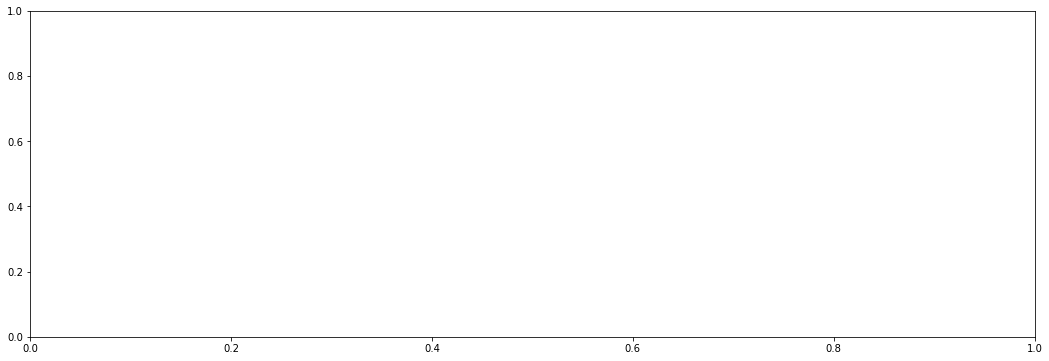

In [49]:
fig = plt.figure(figsize = (18, 6))
x = df_movies_financial['genres'].value_counts().nlargest(15)
plt.bar(x, df_movies_financial['world_profit'])
plt.xlabel('Genres')
plt.ylabel('Profit')
plt.title("Distribution of Movie Genres")
plt.show();
#ax.hist(df_movies_financial['genres'])
#ax.set_xlabel('Genres')
#ax.set_ylabel("Count")
#ax.set_title("Distribution of Movie Genres");

In [ ]:
pd.read_sql("""
    SELECT *
    FROM sqlite_schema;
""", conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."
8,table,budgets,budgets,41369,"CREATE TABLE ""budgets"" (\n""id"" INTEGER,\n ""re..."
9,table,dir_info,dir_info,41471,"CREATE TABLE dir_info(\n person_id TEXT,\n p..."


In [ ]:
pd.read_sql("""
            SELECT numvotes, typeof(numvotes)
            FROM movie_ratings
""", conn)            

,numvotes,typeof(numvotes)
0,31,integer
1,559,integer
2,20,integer
3,50352,integer
4,21,integer
...,...,...
73851,25,integer
73852,24,integer
73853,14,integer
73854,5,integer
